# Laboratorio 3: Modelos lineales

Integrantes: **José Pablo Canales y Sebastián Salas Lavado**


## Instrucciones

1.  Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2.  Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda.

3.  Para cada pregunta **incluya el código fuente que utilizó para llegar a su respuesta. Respuestas sin código no recibirán puntaje.**.

4.  El formato de entrega para esta actividad es un archivo **html**. **Genere un archivo HTML usando Jupyter** y súbalo a U-Cursos. Basta con que un/a integrante haga la entrega. Si ambos/as hacen una entrega en U-Cursos, se revisará cualquiera de éstas.


#### **Se recomienda fuertemente que no usen ChatGPT para resolver la actividad, ya que la experiencia de aprendizaje es mucho mayor si lo hacen por su cuenta.**

In [517]:
%matplotlib inline

## Dataset sintético

Simulamos un dataset con datos aleatorios, siguiendo una distribución uniforme $\mathcal{U}_{(0,1)}$.

In [518]:
from numpy import random
n = 1000
X = random.rand(n, 2)
X[:5]

array([[0.06364451, 0.12371346],
       [0.42028574, 0.18676767],
       [0.57253013, 0.02427377],
       [0.37849374, 0.56811691],
       [0.47129174, 0.37298721]])

Crearemos el siguiente modelo inicial: $Y = 3 X_1 - 2 X_2^2 + \epsilon$.

Necesitaremos aproximar $Y$ usando los descriptores $X_1$ y $X_2$.

$\epsilon $~$ \mathcal{U}_{(0,1)}$ es una fuente de ruido que no podemos controlar para la predicción.

In [519]:
y = X[:, 0] * 3 - 2 * X[:, 1] ** 2 + random.rand(n)
y[:5]

array([0.42100395, 1.52885762, 2.43840024, 1.26021699, 2.01392976])

## Parte 1: División en bases de datos de entrenamiento y de prueba

Necesitamos probar nuestro modelo en una base de datos diferente a la utilizada para el entrenamiento **para medir su capacidad de generalización**.

Queremos que el modelo aprenda la ley $3 X_1 - 2 X_2^2$ y el **sobreaprendizaje equivaldría a memorizar el vector de ruido $\epsilon$**, que solo corresponde a variaciones en $Y$ independientes de nuestro modelo.

Usar [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

1. Separar los datos en conjuntos de entrenamiento y prueba, con un 75% y 25% de los datos respectivamente.

In [520]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


## Parte 2: Regresión Lineal

Encontrar los parámetros $\theta = \begin{pmatrix}
           \theta_{1} \\
           \theta_{2}
         \end{pmatrix}$ solución de $\underset{\theta}{\arg\min} \sum_{i=1}^{n}|Y_i-f_{\theta}(\mathbf{X}_i)|^2$
         
Donde $f_{\theta}(\mathbf{X}) = \theta_0 + \sum_{d=1}^{D}\theta_d X_d$ (en nuestro caso $D=2$)

Calcular el coeficiente $R^2$.
$$R^2=1-\frac{\sum_{i=1}^{n}|Y_i-f(\mathbf{X}_i)|^2}{\sum_{i=1}^{n}|Y_i-\overline{Y}|^2}$$

Donde $\mathbf{X} = \begin{pmatrix}
           X_{1} \\
           X_{2}
         \end{pmatrix}$ y $\overline{Y}=\frac{1}{n}\sum_{i=1}^{n}Y_i$

2. Entrene un modelo de regresión lineal con los datos.

Use : [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).


In [521]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

3. Imprima los primeros 5 valores de y_test, y los 5 primeros valores predichos por el modelo.

In [522]:
y_pred = reg.predict(X_test)

print(y_test[:5])

y_pred[:5]

[2.79726022 1.11110157 0.457045   1.1235261  1.61843766]


array([2.35110984, 0.63353105, 0.7575102 , 1.14555883, 1.04272349])

4. ¿Cuál es el coeficiente $R^2$ del modelo?

Use [r2_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).

In [523]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9147366440988174

## Parte 3: mejorar el modelo aplicando una transformación bien elegida

El modelo inicial es: $Y = 3 X_1 - 2 X_2^2 + \epsilon$. Añadiremos coeficientes polinomiales con [PolynomialFeatures](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

El conjunto de descriptores inicial $\mathbf{X} = \begin{pmatrix} X_{1} \\ X_{2} \end{pmatrix}$
se convertirá ahora en $\mathbf{X} = \begin{pmatrix} 1 \\ X_{1} \\ X_{2} \\ X_{1}^2 \\ X_{1}X_{2} \\ X_{2}^2 \end{pmatrix}$ lo que deja:

$$f_{\theta}(\mathbf{X}) = \theta'_0 + \theta_1 X_1 + \theta_2 X_2 + \theta_3 X_1^2 + \theta_4 X_1X_2 + \theta_5 X_2^2$$

5. Genere un conjunto de descriptores `X_train2` con `PolynomialFeatures()` usando el parámetro `degree=2`

In [524]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train2 = poly.fit_transform(X_train)
x_test2 = poly.transform(X_test)

print(x_train2)

[[1.         0.19489345 0.50460522 0.03798346 0.09834425 0.25462643]
 [1.         0.65589702 0.875948   0.43020091 0.57453169 0.7672849 ]
 [1.         0.55178004 0.44725884 0.30446121 0.2467885  0.20004047]
 ...
 [1.         0.04572799 0.24245616 0.00209105 0.01108703 0.05878499]
 [1.         0.12221479 0.41281197 0.01493645 0.05045173 0.17041372]
 [1.         0.08580436 0.28182389 0.00736239 0.02418172 0.0794247 ]]


6. Imprima los primeros 5 valores de `X_train` y de `X_train2`

In [525]:
X_train[:5]

array([[0.19489345, 0.50460522],
       [0.65589702, 0.875948  ],
       [0.55178004, 0.44725884],
       [0.20228148, 0.50560586],
       [0.96479199, 0.79463892]])

In [526]:
x_train2[:5]

array([[1.        , 0.19489345, 0.50460522, 0.03798346, 0.09834425,
        0.25462643],
       [1.        , 0.65589702, 0.875948  , 0.43020091, 0.57453169,
        0.7672849 ],
       [1.        , 0.55178004, 0.44725884, 0.30446121, 0.2467885 ,
        0.20004047],
       [1.        , 0.20228148, 0.50560586, 0.0409178 , 0.1022747 ,
        0.25563729],
       [1.        , 0.96479199, 0.79463892, 0.93082358, 0.76666126,
        0.63145101]])

7. Entrene el modelo de regresión lineal con PolynomialFeatures. ¿Cuál es su coeficiente $R^2$?

In [527]:
reg2 = LinearRegression().fit(x_train2, y_train)

y_pred = reg2.predict(x_test2)
r2_score(y_test, y_pred)


0.9346519980499641

## Parte 4: Entrenar un modelo random forest

Use: [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

8. Entrene un modelo de regresión Random Forest sobre los datos (sin PolynomialFeatures)

In [528]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor().fit(X_train, y_train)

9. ¿Cuál es su coeficiente $R^2$?

In [529]:
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.9137397241016831

10. Entrene un modelo `RandomForest` con `PolynomialFeatures` y `degree=2`

In [530]:
poly = PolynomialFeatures(degree=2)
x_train2 = poly.fit_transform(X_train)
x_test2 = poly.transform(X_test)

print(x_train2)
rf2 = RandomForestRegressor().fit(x_train2, y_train)

y_pred = rf2.predict(x_test2)
r2_score(y_test, y_pred)


[[1.         0.19489345 0.50460522 0.03798346 0.09834425 0.25462643]
 [1.         0.65589702 0.875948   0.43020091 0.57453169 0.7672849 ]
 [1.         0.55178004 0.44725884 0.30446121 0.2467885  0.20004047]
 ...
 [1.         0.04572799 0.24245616 0.00209105 0.01108703 0.05878499]
 [1.         0.12221479 0.41281197 0.01493645 0.05045173 0.17041372]
 [1.         0.08580436 0.28182389 0.00736239 0.02418172 0.0794247 ]]


0.9167630532384476

## Parte 5: Comparemos los modelos

Compararemos los modelos con los datos iniciales y datos nuevos.

Los datos nuevos representan la misma función en otro rango. Estos se generan con $X_1, X_2$ ~ $\mathcal{U}_{(0.5,1.5)}$

In [531]:
X_test2 = random.rand(n, 2) + 0.5
y_test2 = X_test2[:, 0] * 3 - 2 * X_test2[:, 1] ** 2 + random.rand(n)

11. Genere una tabla (un DataFrame de pandas) que muestre para cada uno de los 4 modelos entrenados, los coeficientes $R^2$ al predecir los datos iniciales, y los coeficientes al predecir los datos generados en la celda anterior.

In [532]:
import pandas as pd

x_test2poly = poly.transform(X_test2)
x_test_old_poly = poly.transform(X_test)

res = []
for model in [reg, reg2, rf, rf2]:
    name = model.__class__.__name__  

    if model in [reg, rf]:
        y_pred_new = model.predict(X_test2)
        y_pred_old = model.predict(X_test)
    else:
        y_pred_new = model.predict(x_test2poly)
        y_pred_old = model.predict(x_test_old_poly)
    
    r2_new = r2_score(y_test2, y_pred_new)
    r2_old = r2_score(y_test, y_pred_old)
    
    res.append({
        'Modelo': name,
        'R2 en datos originales': r2_old,
        'R2 en datos nuevos': r2_new
    })

df_resultados = pd.DataFrame(res)
print(df_resultados)

                  Modelo  R2 en datos originales  R2 en datos nuevos
0       LinearRegression                0.914737            0.718597
1       LinearRegression                0.934652            0.959561
2  RandomForestRegressor                0.913740            0.501323
3  RandomForestRegressor                0.916763            0.491884


12. ¿Cuál modelo tiene el mejor desempeño? ¿Por qué un modelo generaliza mejor que el resto?

R: Se tiene que la regresión lineal con variables polinómicas tiene el mejor desempeño global. Esto puede ser debido a que RandomForest está haciendo overfitting

13. ¿Cuáles son los coeficientes aprendidos por el modelo de regresión lineal con PolynomicFeatures?

In [533]:
coef_reg2 = reg2.coef_
print(coef_reg2)

[ 0.          3.07095153 -0.29818813 -0.03264465 -0.06777978 -1.7158038 ]


## Parte 6: Visualizando el sobreajuste con un árbol de decisión

A medida que aumenta la complejidad del modelo, se produce de nuevo un sobreajuste. De igual forma, el modelo que utiliza solo $X_1$ y $X_2$ no está necesariamente adaptado al problema y presenta un caso de subaprendizaje.

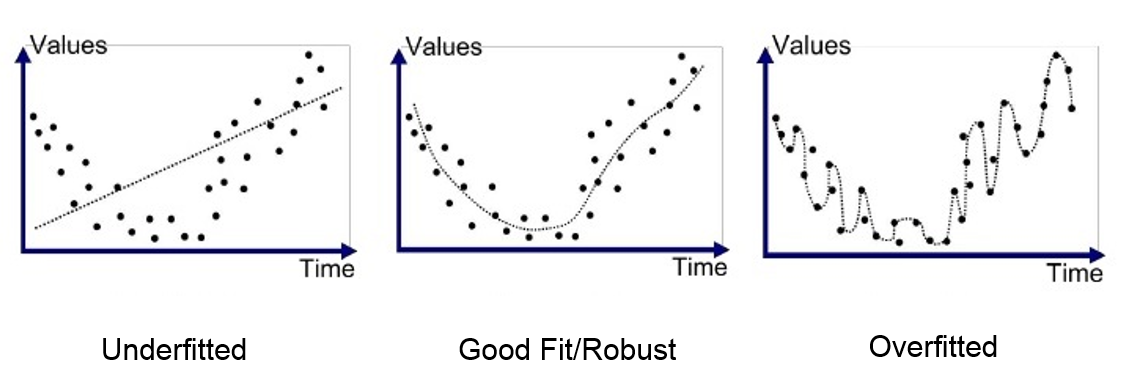

Para el primer conjunto de datos {X_train, y_train},

14. Entrene un **Arbol de Decisión** con el argumento `max_depth`= 1...20. Para cada uno, guarde su coeficiente $R^2$ al predecir el conjunto de entrenamiento, y al predecir el conjunto de prueba.

In [534]:
from sklearn.tree import DecisionTreeRegressor

res = []
for md in range(1, 20):
    tree = DecisionTreeRegressor(max_depth=md)
    tree.fit(X_train, y_train)

    r2_train = tree.score(X_train, y_train)
    r2_test = tree.score(X_test, y_test)

    res.append((md, r2_train, r2_test))
res

[(1, 0.5179955156628988, 0.4592699924574112),
 (2, 0.7578546504111975, 0.7308553938403493),
 (3, 0.8532595936850074, 0.8292353687297386),
 (4, 0.9032981002986606, 0.875056390232551),
 (5, 0.9357364229136909, 0.8928173290289132),
 (6, 0.9510800831379563, 0.900929966844057),
 (7, 0.9658972988917596, 0.8971557760651505),
 (8, 0.9763259148489467, 0.888993533769779),
 (9, 0.9860079600447672, 0.8864567650408954),
 (10, 0.9923040044244743, 0.8806150475230772),
 (11, 0.9962992129491189, 0.8675807421822045),
 (12, 0.9978593846641439, 0.873445177121313),
 (13, 0.9988576974548525, 0.8683385170610549),
 (14, 0.9996008138894533, 0.8729578205913311),
 (15, 0.9998326984637672, 0.8692884572949677),
 (16, 0.9999514204710621, 0.8709705459612097),
 (17, 0.999999136036497, 0.8680808118939882),
 (18, 1.0, 0.8737681757042861),
 (19, 1.0, 0.8708619512211431)]

15. Muestre un gráfico de la evolución de los coeficientes $R^2$ de la parte anterior según la profundidad máxima del árbol de decisión.

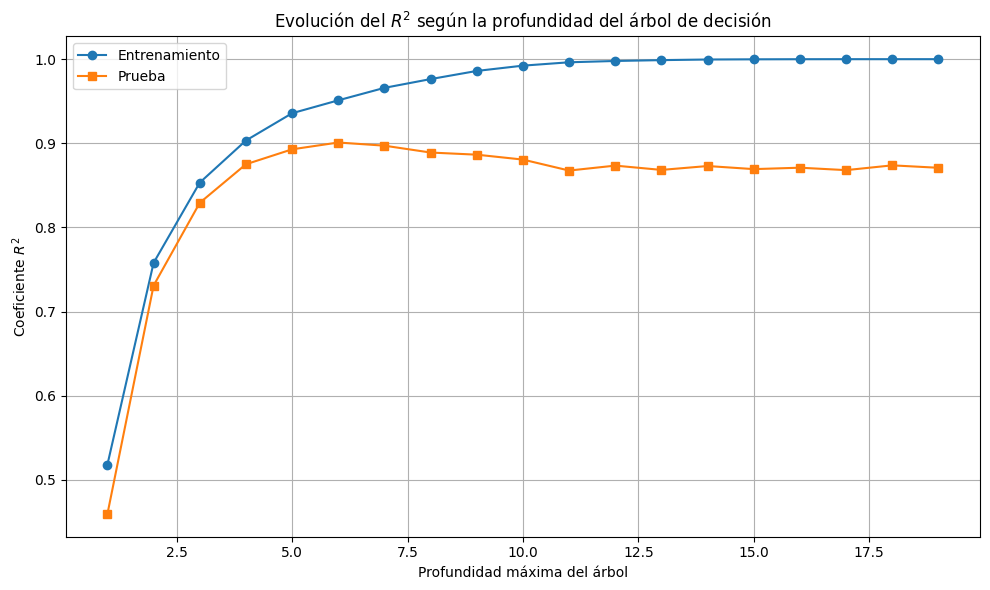

In [535]:
import matplotlib.pyplot as plt

# Separar las tripletas
alturas, r2_train, r2_test = zip(*res)

plt.figure(figsize=(10, 6))
plt.plot(alturas, r2_train, label="Entrenamiento", marker='o')
plt.plot(alturas, r2_test, label="Prueba", marker='s')
plt.xlabel("Profundidad máxima del árbol")
plt.ylabel("Coeficiente $R^2$")
plt.title("Evolución del $R^2$ según la profundidad del árbol de decisión")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Parte 7: Aumentar el número de características y regularizar una regresión

El objetivo es examinar el impacto de la regularización de los coeficientes de una regresión a medida que aumenta el número de coeficientes. Utilizamos características polinómicas y técnicas de regularización [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) o [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).

**Regularización**: agregar una penalización al modelo (a la función de entrenamiento) para evitar que aprenda demasiado los datos de entrenamiento.
- Lasso (o L1): se penaliza la suma del valor absoluto de los coeficientes.
- Ridge (o L2): se penaliza la suma de los valores cuadrados de los coeficientes.

16. Genere una tabla donde para cada `degree=1..20`, se guarde:
    * número de coeficientes de $\theta$ (igual al número de columnas de $X$)
    * $R^2$ para cada modelo de regresión
    * norma del vector de coeficientes para cada modelo de regresión
    * cantidad de coeficientes no nulos para cada moelo de regresión

In [536]:
from sklearn.linear_model import Ridge, Lasso
import numpy.linalg as nplin
import numpy as np

def coef_non_nuls(coef):
    return sum(np.abs(coef) > 0.001)

res = []
for d in range(1, 21):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    n_coef = X_train_poly.shape[1]

    # Lineal
    reg = LinearRegression().fit(X_train_poly, y_train)
    r2_reg = reg.score(X_test_poly, y_test)
    norm_reg = nplin.norm(reg.coef_)
    nonzero_reg = coef_non_nuls(reg.coef_)

    # Ridge
    rid = Ridge(alpha=0.001).fit(X_train_poly, y_train)
    r2_ridge = rid.score(X_test_poly, y_test)
    norm_ridge = nplin.norm(rid.coef_)
    nonzero_ridge = coef_non_nuls(rid.coef_)

    # Lasso
    las = Lasso(alpha=0.001).fit(X_train_poly, y_train)
    r2_lasso = las.score(X_test_poly, y_test)
    norm_lasso = nplin.norm(las.coef_)
    nonzero_lasso = coef_non_nuls(las.coef_)

    res.append({
        'degree': d,
        'n_coef': n_coef,
        'r2_lin': r2_reg,
        'norm_lin': norm_reg,
        'nonzero_lin': nonzero_reg,
        'r2_ridge': r2_ridge,
        'norm_ridge': norm_ridge,
        'nonzero_ridge': nonzero_ridge,
        'r2_lasso': r2_lasso,
        'norm_lasso': norm_lasso,
        'nonzero_lasso': nonzero_lasso
    })

df = pd.DataFrame(res)
print(df)

    degree  n_coef    r2_lin      norm_lin  nonzero_lin  r2_ridge  norm_ridge  \
0        1       3  0.914737  3.646520e+00            2  0.914736    3.646463   
1        2       6  0.934652  3.531190e+00            5  0.934650    3.530219   
2        3      10  0.933957  3.693188e+00            9  0.933962    3.682401   
3        4      15  0.933740  9.473181e+00           14  0.933893    7.372654   
4        5      21  0.933221  3.646954e+01           20  0.933545    9.303992   
5        6      28  0.933609  3.183505e+02           27  0.933472    9.891851   
6        7      36  0.933212  1.792508e+03           35  0.933536    8.704007   
7        8      45  0.934193  9.503766e+03           44  0.933585    8.191795   
8        9      55  0.932094  1.209656e+05           54  0.933609    8.992487   
9       10      66  0.931008  3.593571e+05           65  0.933641   10.496415   
10      11      78  0.931904  2.050284e+06           78  0.933699   11.979700   
11      12      91  0.930567

17. Genere un gráfico de $R^2$ de cada modelo (Regresión Lineal, Ridge y Lasso) en función del número de coeficientes, y uno de cantidad de coeficientes no nulos de cada modelo en función del número de coeficientes

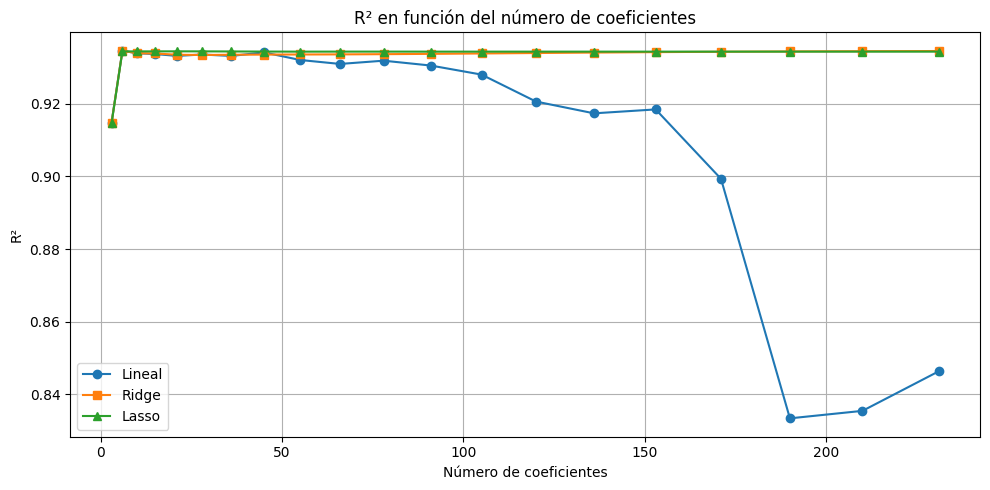

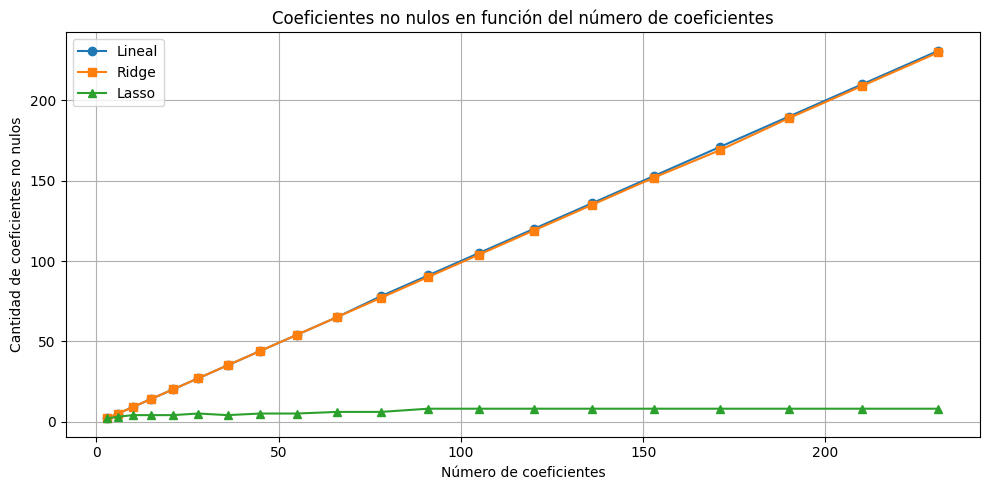

In [537]:
import matplotlib.pyplot as plt

# Desempeño
plt.figure(figsize=(10, 5))
plt.plot(df['n_coef'], df['r2_lin'], label='Lineal', marker='o')
plt.plot(df['n_coef'], df['r2_ridge'], label='Ridge', marker='s')
plt.plot(df['n_coef'], df['r2_lasso'], label='Lasso', marker='^')
plt.xlabel('Número de coeficientes')
plt.ylabel('R²')
plt.title('R² en función del número de coeficientes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Coefs no nulos
plt.figure(figsize=(10, 5))
plt.plot(df['n_coef'], df['nonzero_lin'], label='Lineal', marker='o')
plt.plot(df['n_coef'], df['nonzero_ridge'], label='Ridge', marker='s')
plt.plot(df['n_coef'], df['nonzero_lasso'], label='Lasso', marker='^')
plt.xlabel('Número de coeficientes')
plt.ylabel('Cantidad de coeficientes no nulos')
plt.title('Coeficientes no nulos en función del número de coeficientes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

¿Por qué el desempeño de la regresión lineal cae? ¿Por qué los modelos Ridge y Lasso difieren en la cantidad de coeficientes no nulos?

R: El desempeño decae producto del overfitting, a medida que se aumenta el grado de los polinomios se ajusta el modelo sin embargo si esto crece demasiado el modelo también aprende del ruido por tanto decae el desempeño. Luego los modelos de ridge y lasso difieren en la cantidad de coeficientes no nulos, por un lado ridge penaliza la magnitud de los coeficientes (suma de cuadrados), pero no los fuerza a ser cero mientras que lasso penaliza la suma de los valores absolutos lo que hace que los coeficientes bajen a 0, esto puede ajustarse variando el valor de penalización alpha (por ejemplo en 0.001 Lasso tendrá coeficientes no nulos).